In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [2]:
import os
HOME = os.getcwd()
print(HOME)
import os

# Thiết lập mã hóa UTF-8
os.environ['LC_ALL'] = 'en_US.UTF-8'
os.environ['LANG'] = 'en_US.UTF-8'

# Cài đặt locale UTF-8
!apt-get update
!apt-get install -y locales
!locale-gen en_US.UTF-8
!update-locale LANG=en_US.UTF-8

/content
Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:4 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:5 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Ign:7 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:8 https://r2u.stat.illinois.edu/ubuntu jammy Release
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:12 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Rea

In [3]:
!git clone https://github.com/THU-MIG/yolov10.git
%cd yolov10
!pip install -r requirements.txt -q

fatal: destination path 'yolov10' already exists and is not an empty directory.
/content/yolov10


In [4]:
import cv2
from ultralytics import YOLOv10
path="/content/drive/MyDrive/workspace/yolov10n.pt"
model = YOLOv10(path)

In [5]:
# cài thư viện roboflow
!pip install -q roboflow


In [6]:
import os
import shutil
HOME = os.getcwd()
print(HOME)

/content/yolov10


In [7]:
SOURCE_IMAGE_PATH="/content/drive/MyDrive/workspace/face detection/crowd.jpg"
results = model.predict(SOURCE_IMAGE_PATH)


image 1/1 /content/drive/MyDrive/workspace/face detection/crowd.jpg: 448x640 10 persons, 3 kites, 131.2ms
Speed: 18.4ms preprocess, 131.2ms inference, 50.9ms postprocess per image at shape (1, 3, 448, 640)


In [8]:

# đường dẫn lưu kết quả dự đoán
results_path = f"{HOME}/drive/MyDrive/workspace/face detection/yolov10/runs/detect/exp2/"
os.makedirs(results_path, exist_ok=True)
# lưu ảnh
results[0].save(os.path.join(results_path, "crowed.jpeg"))

'/content/yolov10/drive/MyDrive/workspace/face detection/yolov10/runs/detect/exp2/crowed.jpeg'

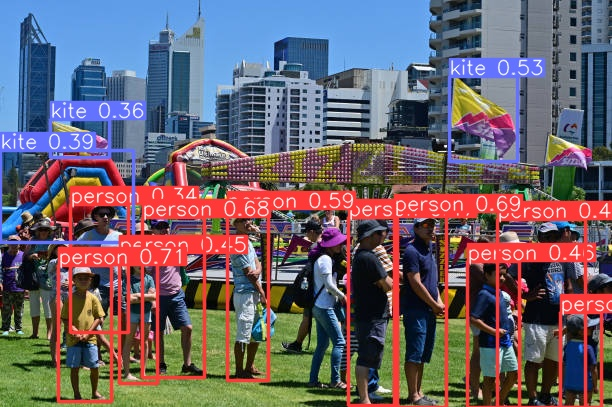

In [9]:
from IPython.display import Image
# hiển thị ảnh
Image(filename=f"{HOME}/drive/MyDrive/workspace/face detection/yolov10/runs/detect/exp2/crowed.jpeg", width=600)

In [10]:
# download dataset
from roboflow import Roboflow
rf = Roboflow(api_key="NE9kv0lDkXGTLstd525w")
project = rf.workspace("mohamed-traore-2ekkp").project("face-detection-mik1i")
version = project.version(15)
dataset = version.download("yolov9")

loading Roboflow workspace...
loading Roboflow project...


In [11]:
import yaml
# hàm đọc file yaml
def read_yaml(file_path):
    with open(file_path, 'r') as file:
        return yaml.safe_load(file)
# hàm vết vào file yaml
def write_yaml(file_path, data):
    with open(file_path, 'w') as file:
        yaml.dump(data, file, default_flow_style=False)

In [12]:
file_path = f'{dataset.location}/data.yaml'
# đọc yaml file
data = read_yaml(file_path)

In [13]:
data['val'] = f'{dataset.location}/valid/images'
data['train'] = f'{dataset.location}/train/images'

In [14]:
write_yaml(file_path, data)
print(dataset.location)

/content/yolov10/Face-Detection-15


In [17]:
#train mô hình
model.train(data='/content/yolov10/Face-Detection-15/data.yaml', epochs=40, batch=16, imgsz=640)

New https://pypi.org/project/ultralytics/8.2.68 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.0.1+cu117 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=/content/drive/MyDrive/workspace/yolov10n.pt, data=/content/yolov10/Face-Detection-15/data.yaml, epochs=40, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, val_period=1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False,

100%|██████████| 755k/755k [00:00<00:00, 28.4MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1      9856  ultralytics.nn.modules.block.SCDown          [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1     36096  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 113MB/s]


AMP: checks passed ✅


train: Scanning /content/yolov10/Face-Detection-15/train/labels... 2871 images, 539 backgrounds, 0 corrupt: 100%|██████████| 2871/2871 [00:01<00:00, 2151.50it/s]


train: New cache created: /content/yolov10/Face-Detection-15/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


Got processor for bboxes, but no transform to process it.
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
val: Scanning /content/yolov10/Face-Detection-15/valid/labels... 267 images, 50 backgrounds, 0 corrupt: 100%|██████████| 267/267 [00:00<00:00, 1113.25it/s]

val: New cache created: /content/yolov10/Face-Detection-15/valid/labels.cache


Plotting labels to /content/yolov10/runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 95 weight(decay=0.0), 108 weight(decay=0.0005), 107 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to /content/yolov10/runs/detect/train
Starting training for 40 epochs...

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       1/40       3.8G      2.197      2.969      2.296      1.941      6.397      2.038          9        640: 100%|██████████| 180/180 [01:17<00:00,  2.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.35it/s]

                   all        267        506      0.388       0.33      0.304      0.133



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       2/40      3.57G      1.747       2.02      1.771      1.637      3.477      1.611         17        640: 100%|██████████| 180/180 [01:15<00:00,  2.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.11it/s]


                   all        267        506      0.535      0.445      0.458      0.219

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       3/40       3.7G      1.654      1.705      1.668      1.634      2.365      1.554         20        640: 100%|██████████| 180/180 [01:12<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.34it/s]


                   all        267        506      0.534      0.492      0.524      0.267

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       4/40      3.88G      1.608      1.553      1.607      1.646      2.017      1.519         31        640: 100%|██████████| 180/180 [01:13<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.06it/s]

                   all        267        506       0.71      0.478      0.583      0.306



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       5/40      3.55G      1.545      1.443       1.56      1.599      1.846       1.49         29        640: 100%|██████████| 180/180 [01:14<00:00,  2.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.11it/s]

                   all        267        506      0.744      0.573      0.662      0.328



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       6/40      3.76G      1.522      1.355      1.521      1.593      1.708      1.467         55        640: 100%|██████████| 180/180 [01:14<00:00,  2.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.15it/s]

                   all        267        506      0.666      0.532       0.61      0.345



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       7/40      3.51G      1.448      1.272      1.471      1.545      1.593      1.425         17        640: 100%|██████████| 180/180 [01:13<00:00,  2.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.12it/s]

                   all        267        506       0.76      0.615      0.692      0.357



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       8/40      3.89G      1.444      1.238      1.457      1.524       1.55      1.411         12        640: 100%|██████████| 180/180 [01:13<00:00,  2.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.08it/s]


                   all        267        506      0.775      0.595      0.698      0.387

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


       9/40      3.71G       1.42      1.218      1.436      1.504      1.551      1.397         24        640: 100%|██████████| 180/180 [01:12<00:00,  2.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.21it/s]

                   all        267        506      0.746      0.654       0.73      0.408



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      10/40      4.03G      1.364      1.133      1.408      1.466      1.444      1.387          9        640: 100%|██████████| 180/180 [01:11<00:00,  2.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.17it/s]


                   all        267        506      0.785      0.617      0.734      0.418

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      11/40      3.87G      1.345      1.128      1.382      1.448      1.418      1.358         25        640: 100%|██████████| 180/180 [01:11<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.86it/s]

                   all        267        506      0.773      0.662      0.756      0.426



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      12/40      3.71G      1.312      1.083      1.363      1.408      1.372      1.349         17        640: 100%|██████████| 180/180 [01:10<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.92it/s]


                   all        267        506       0.76      0.681      0.768      0.453

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      13/40      3.37G      1.289      1.032      1.349      1.399      1.281      1.341         21        640: 100%|██████████| 180/180 [01:10<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.83it/s]

                   all        267        506      0.812      0.704      0.799      0.471



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      14/40      3.87G      1.279      1.017      1.334      1.374      1.276      1.329         14        640: 100%|██████████| 180/180 [01:09<00:00,  2.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.81it/s]

                   all        267        506      0.805      0.664      0.772      0.441



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      15/40      4.35G      1.267      1.001      1.317       1.38      1.232       1.31         11        640: 100%|██████████| 180/180 [01:09<00:00,  2.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.98it/s]

                   all        267        506      0.783      0.633      0.744      0.417



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      16/40      3.92G      1.235     0.9537      1.299      1.357       1.18      1.303         18        640: 100%|██████████| 180/180 [01:09<00:00,  2.60it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  2.22it/s]


                   all        267        506      0.822      0.691      0.791       0.46

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      17/40      3.48G      1.214     0.9288      1.285      1.329      1.132      1.288         34        640: 100%|██████████| 180/180 [01:10<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.60it/s]


                   all        267        506      0.797       0.69      0.792      0.461

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      18/40      3.49G      1.226     0.9359      1.293       1.34      1.137      1.289         15        640: 100%|██████████| 180/180 [01:11<00:00,  2.50it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.22it/s]


                   all        267        506      0.816      0.728      0.808       0.48

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      19/40       3.7G      1.203      0.915      1.278      1.319      1.129      1.275         15        640: 100%|██████████| 180/180 [01:11<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.08it/s]

                   all        267        506      0.818      0.682      0.804      0.478



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      20/40      4.29G      1.172     0.8873      1.246      1.295      1.089      1.249         23        640: 100%|██████████| 180/180 [01:13<00:00,  2.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.10it/s]

                   all        267        506      0.803      0.723      0.812      0.492



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      21/40      3.66G      1.161     0.8688      1.247      1.278      1.059      1.249         13        640: 100%|██████████| 180/180 [01:11<00:00,  2.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.06it/s]

                   all        267        506      0.817      0.729       0.82      0.505



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      22/40      3.66G      1.142     0.8528      1.235      1.255      1.045      1.238         14        640: 100%|██████████| 180/180 [01:11<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.58it/s]

                   all        267        506      0.855      0.702      0.815      0.491



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      23/40      3.72G      1.126     0.8195      1.218      1.248      1.015      1.231         18        640: 100%|██████████| 180/180 [01:10<00:00,  2.56it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.87it/s]

                   all        267        506      0.822      0.747      0.828       0.51



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      24/40      3.69G      1.133      0.815      1.221      1.256      1.003      1.229         35        640: 100%|██████████| 180/180 [01:08<00:00,  2.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.85it/s]


                   all        267        506      0.855      0.723      0.836      0.514

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      25/40      3.74G      1.108     0.7958      1.206      1.237     0.9704      1.217         12        640: 100%|██████████| 180/180 [01:07<00:00,  2.66it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.98it/s]

                   all        267        506      0.837      0.759      0.842      0.511



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      26/40      3.56G      1.074     0.7536      1.184      1.195     0.9247       1.19         26        640: 100%|██████████| 180/180 [01:08<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.82it/s]

                   all        267        506      0.869      0.725       0.84      0.506



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      27/40      3.89G      1.075     0.7828      1.196      1.199     0.9624       1.21         13        640: 100%|██████████| 180/180 [01:11<00:00,  2.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.99it/s]

                   all        267        506      0.877      0.751      0.833      0.511



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      28/40      3.36G      1.068     0.7558      1.188      1.185     0.9282      1.192         19        640: 100%|██████████| 180/180 [01:12<00:00,  2.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.35it/s]

                   all        267        506      0.862      0.751      0.846      0.524



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      29/40      3.91G      1.045     0.7209      1.171      1.167     0.8694      1.177         24        640: 100%|██████████| 180/180 [01:10<00:00,  2.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.75it/s]


                   all        267        506      0.867      0.759      0.844      0.519

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      30/40      3.52G      1.022     0.7124      1.166      1.136     0.8683      1.179         21        640: 100%|██████████| 180/180 [01:08<00:00,  2.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.80it/s]

                   all        267        506      0.848      0.782      0.849      0.511


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


Got processor for bboxes, but no transform to process it.
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      31/40      4.04G      0.945     0.5783      1.119      1.042     0.6601      1.136         16        640: 100%|██████████| 180/180 [01:05<00:00,  2.74it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.81it/s]

                   all        267        506      0.852      0.773      0.851      0.516



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      32/40       3.7G     0.9425     0.5728      1.114      1.044     0.6508      1.128         10        640: 100%|██████████| 180/180 [01:07<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.33it/s]


                   all        267        506      0.857      0.772      0.857      0.536

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      33/40      3.69G       0.92      0.551      1.094      1.012     0.6275      1.106         14        640: 100%|██████████| 180/180 [01:04<00:00,  2.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:05<00:00,  1.78it/s]

                   all        267        506      0.881      0.757       0.86      0.531



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      34/40      4.04G      0.901     0.5464      1.079     0.9974     0.6248      1.087         12        640: 100%|██████████| 180/180 [01:04<00:00,  2.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.34it/s]

                   all        267        506      0.849      0.776      0.852      0.528



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      35/40      4.06G     0.8782     0.5277      1.083     0.9681     0.5965       1.09          7        640: 100%|██████████| 180/180 [01:07<00:00,  2.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.59it/s]


                   all        267        506      0.862      0.742      0.852      0.517

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      36/40      3.88G      0.877     0.5165      1.069     0.9631     0.5798      1.085          7        640: 100%|██████████| 180/180 [01:03<00:00,  2.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:03<00:00,  2.32it/s]

                   all        267        506      0.879      0.761      0.863      0.534



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      37/40      3.89G     0.8582     0.5006      1.061     0.9499     0.5586      1.075          5        640: 100%|██████████| 180/180 [01:05<00:00,  2.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.35it/s]


                   all        267        506      0.858      0.763       0.85      0.534

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      38/40      3.84G     0.8434     0.4946      1.051     0.9338     0.5514      1.064          6        640: 100%|██████████| 180/180 [01:06<00:00,  2.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.96it/s]


                   all        267        506      0.858      0.781      0.861      0.527

      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      39/40      3.81G     0.8275     0.4836      1.044     0.9248     0.5409      1.055          8        640: 100%|██████████| 180/180 [01:04<00:00,  2.81it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.04it/s]

                   all        267        506      0.865      0.792      0.859      0.537



      Epoch    GPU_mem     box_om     cls_om     dfl_om     box_oo     cls_oo     dfl_oo  Instances       Size


      40/40      3.37G     0.8102     0.4756      1.041     0.8959     0.5313      1.053          7        640: 100%|██████████| 180/180 [01:07<00:00,  2.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:02<00:00,  3.17it/s]

                   all        267        506      0.851      0.783      0.857      0.532



40 epochs completed in 0.842 hours.
Optimizer stripped from /content/yolov10/runs/detect/train/weights/last.pt, 5.8MB
Optimizer stripped from /content/yolov10/runs/detect/train/weights/best.pt, 5.8MB

Validating /content/yolov10/runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.0.1+cu117 CUDA:0 (Tesla T4, 15102MiB)
YOLOv10n summary (fused): 285 layers, 2694806 parameters, 0 gradients


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:06<00:00,  1.47it/s]


                   all        267        506      0.863      0.794      0.859      0.537
Speed: 4.5ms preprocess, 4.9ms inference, 0.0ms loss, 0.1ms postprocess per image
Results saved to /content/yolov10/runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7e5a78bcf5e0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [15]:

current_directory = os.getcwd()
print("Thư mục hiện tại:", current_directory)

Thư mục hiện tại: /content/yolov10


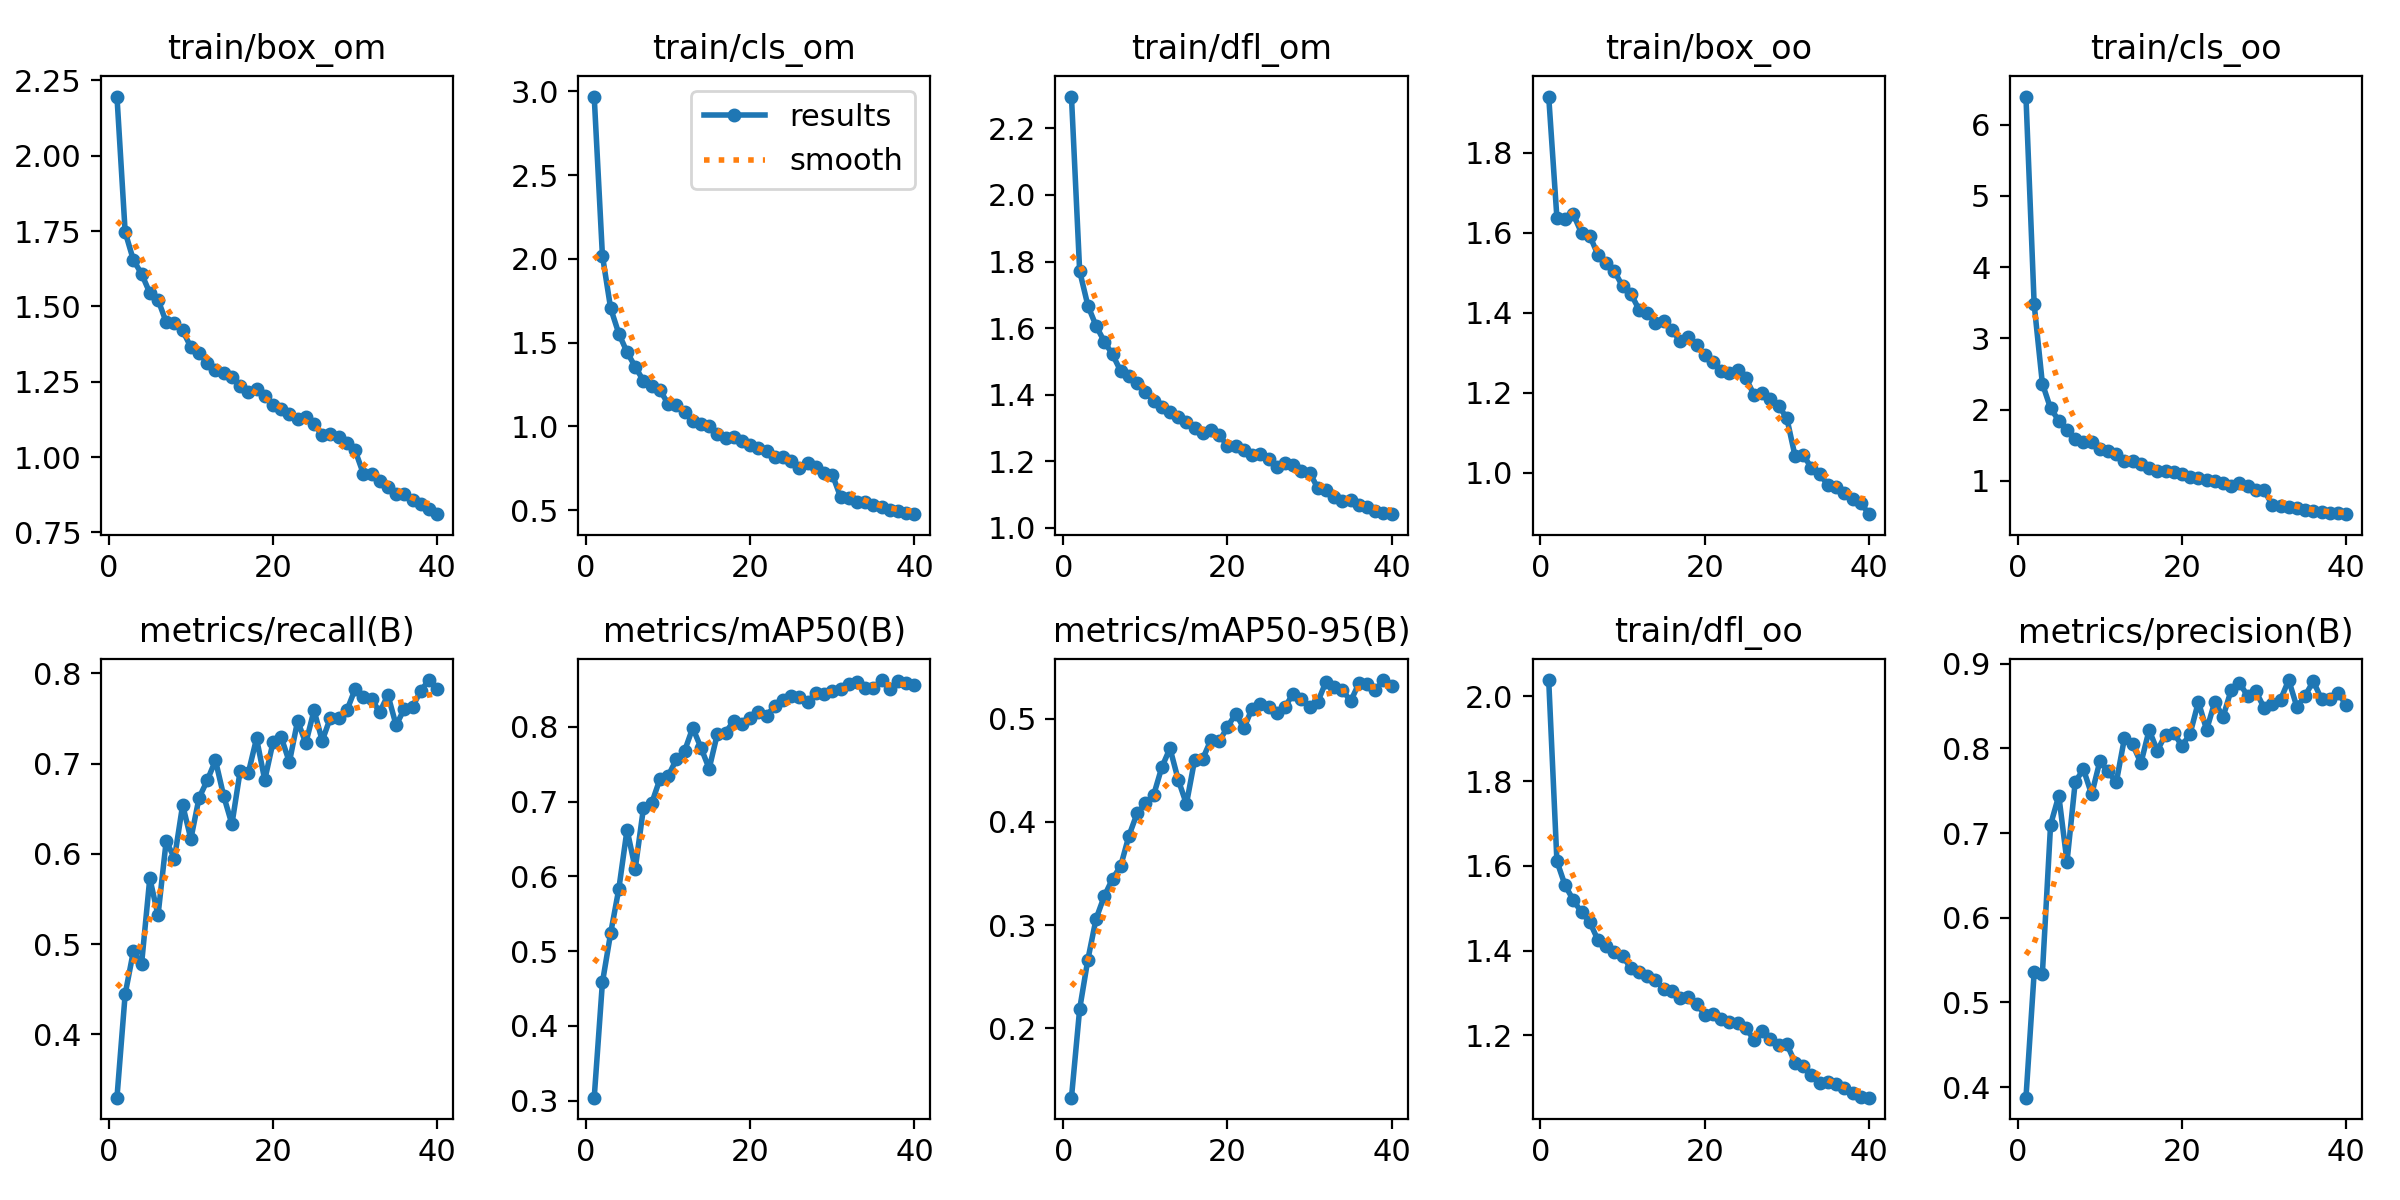

In [16]:
#đánh giá quá trình train
Image(filename=f"/content/yolov10/runs/detect/train/results.png", width=1000)

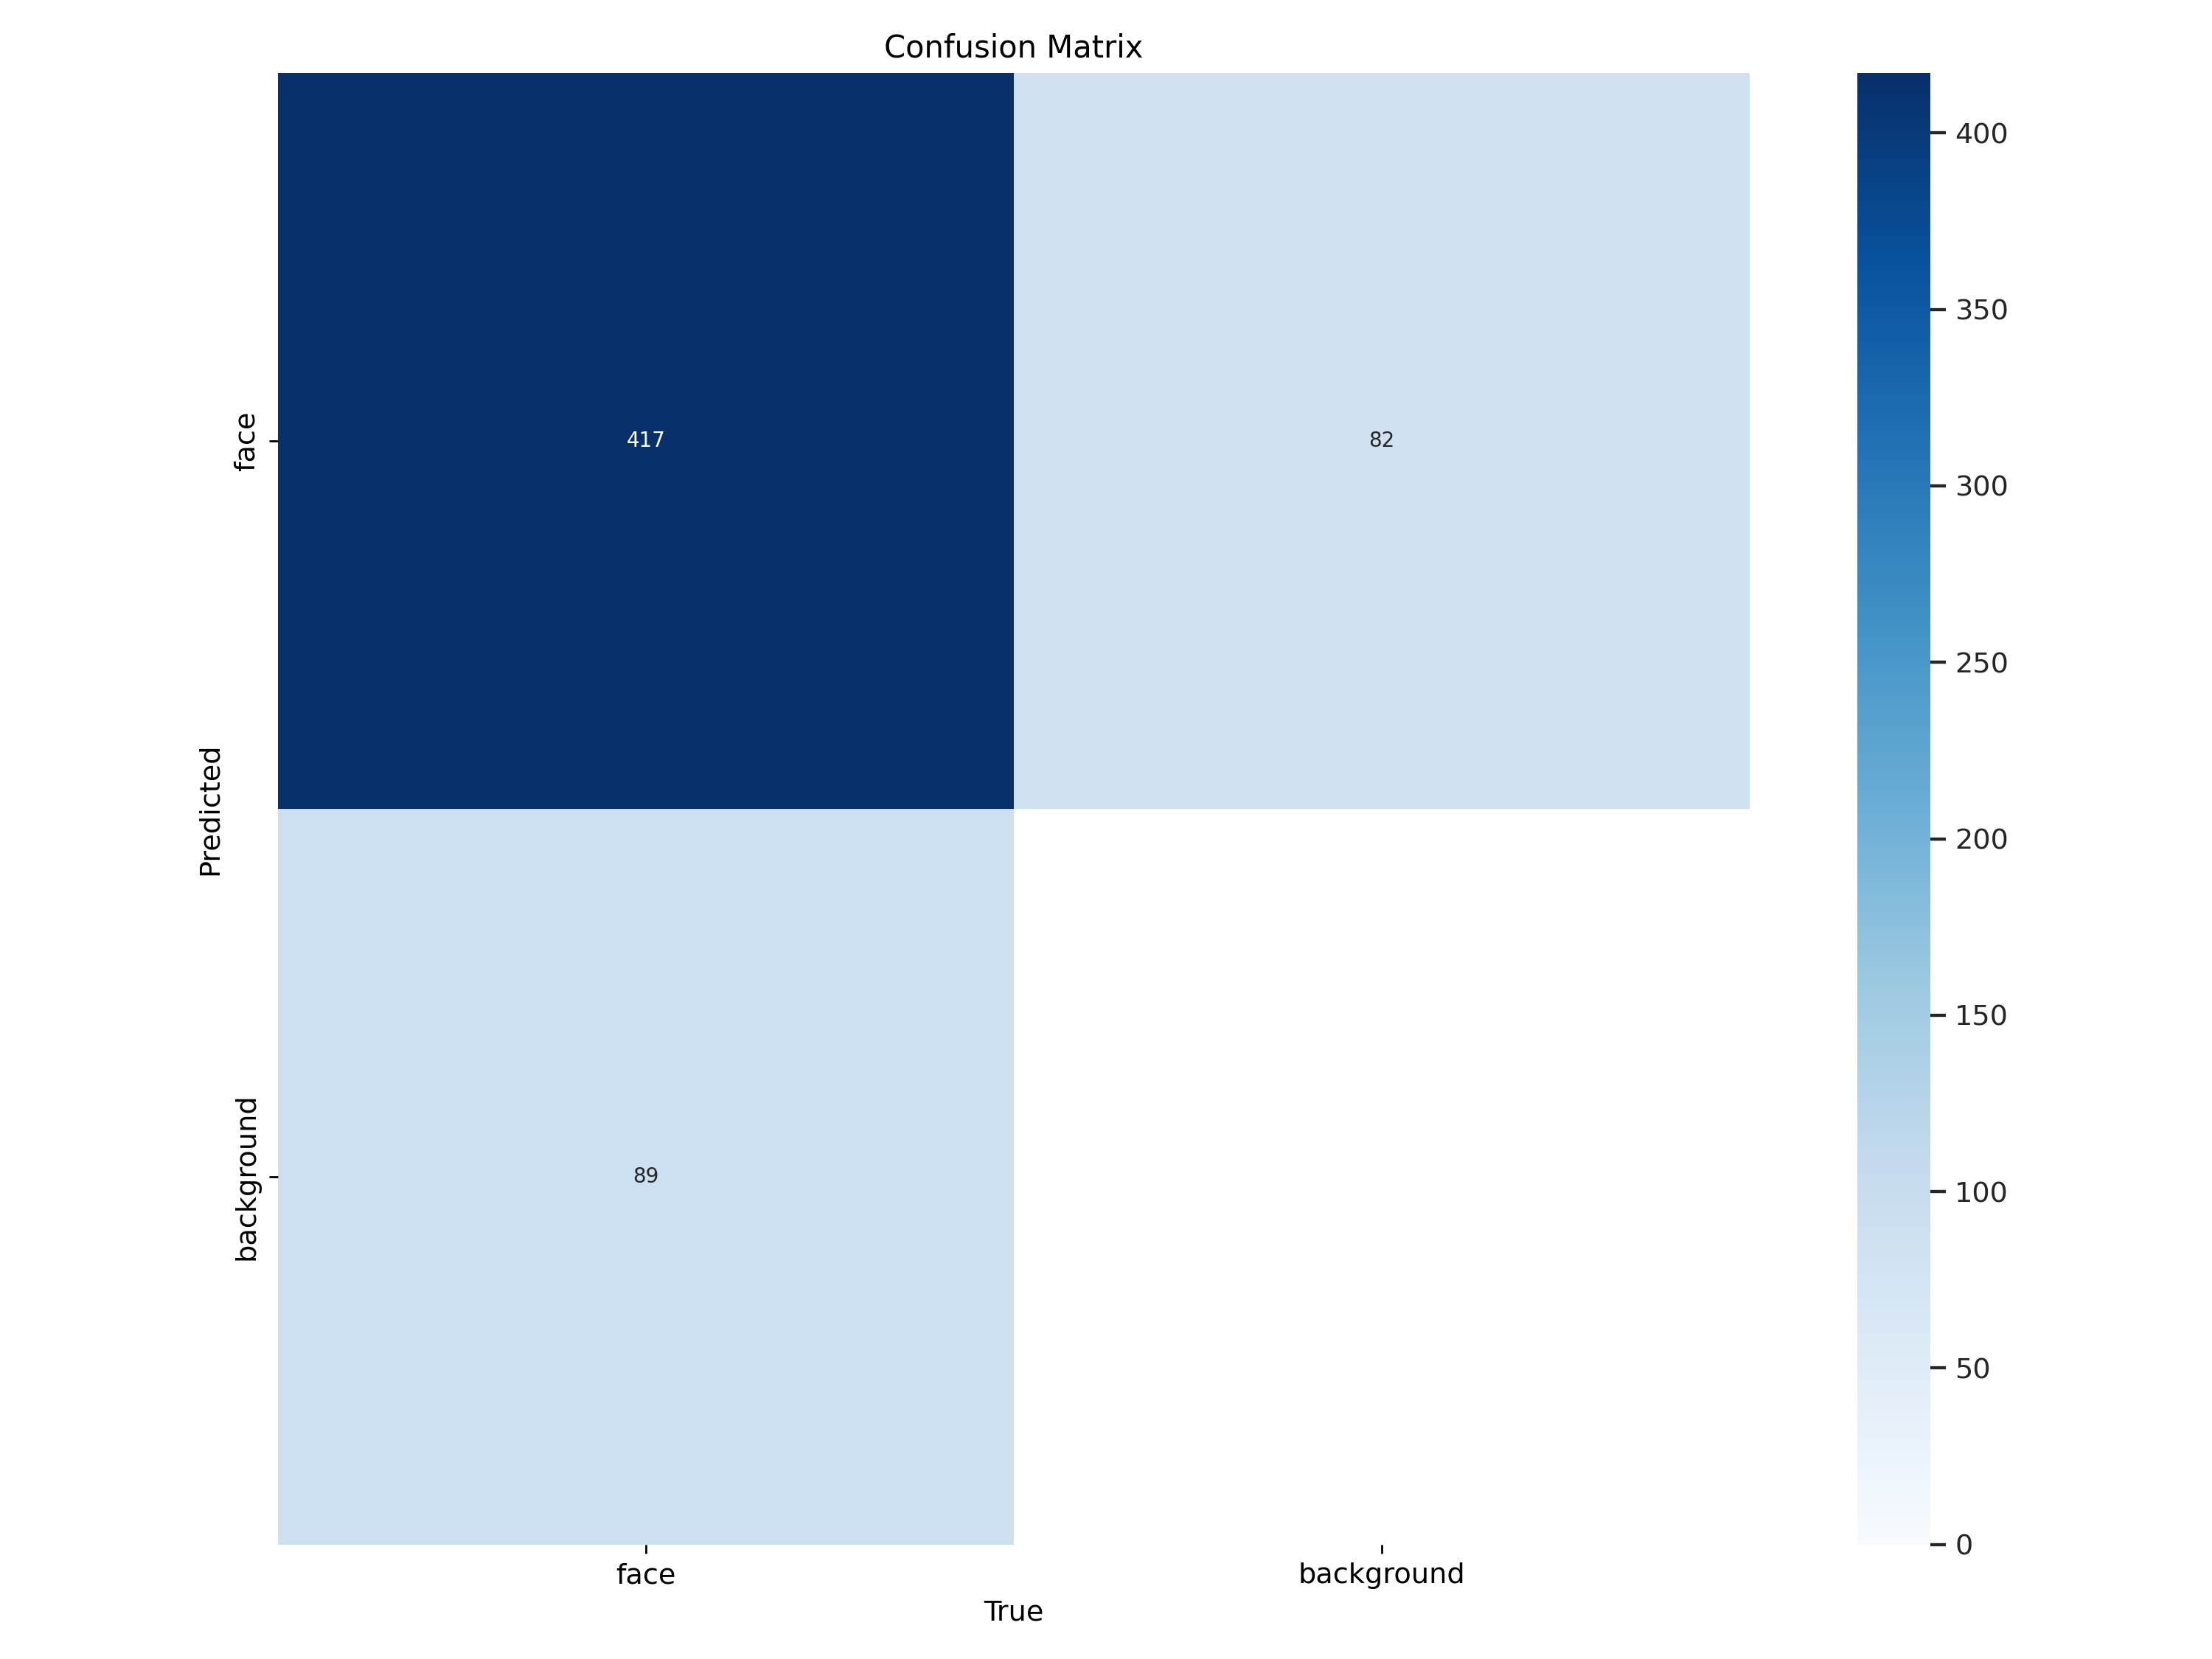

In [17]:
# confusion matrix
Image(filename=f"/content/yolov10/runs/detect/train/confusion_matrix.png", width=10)

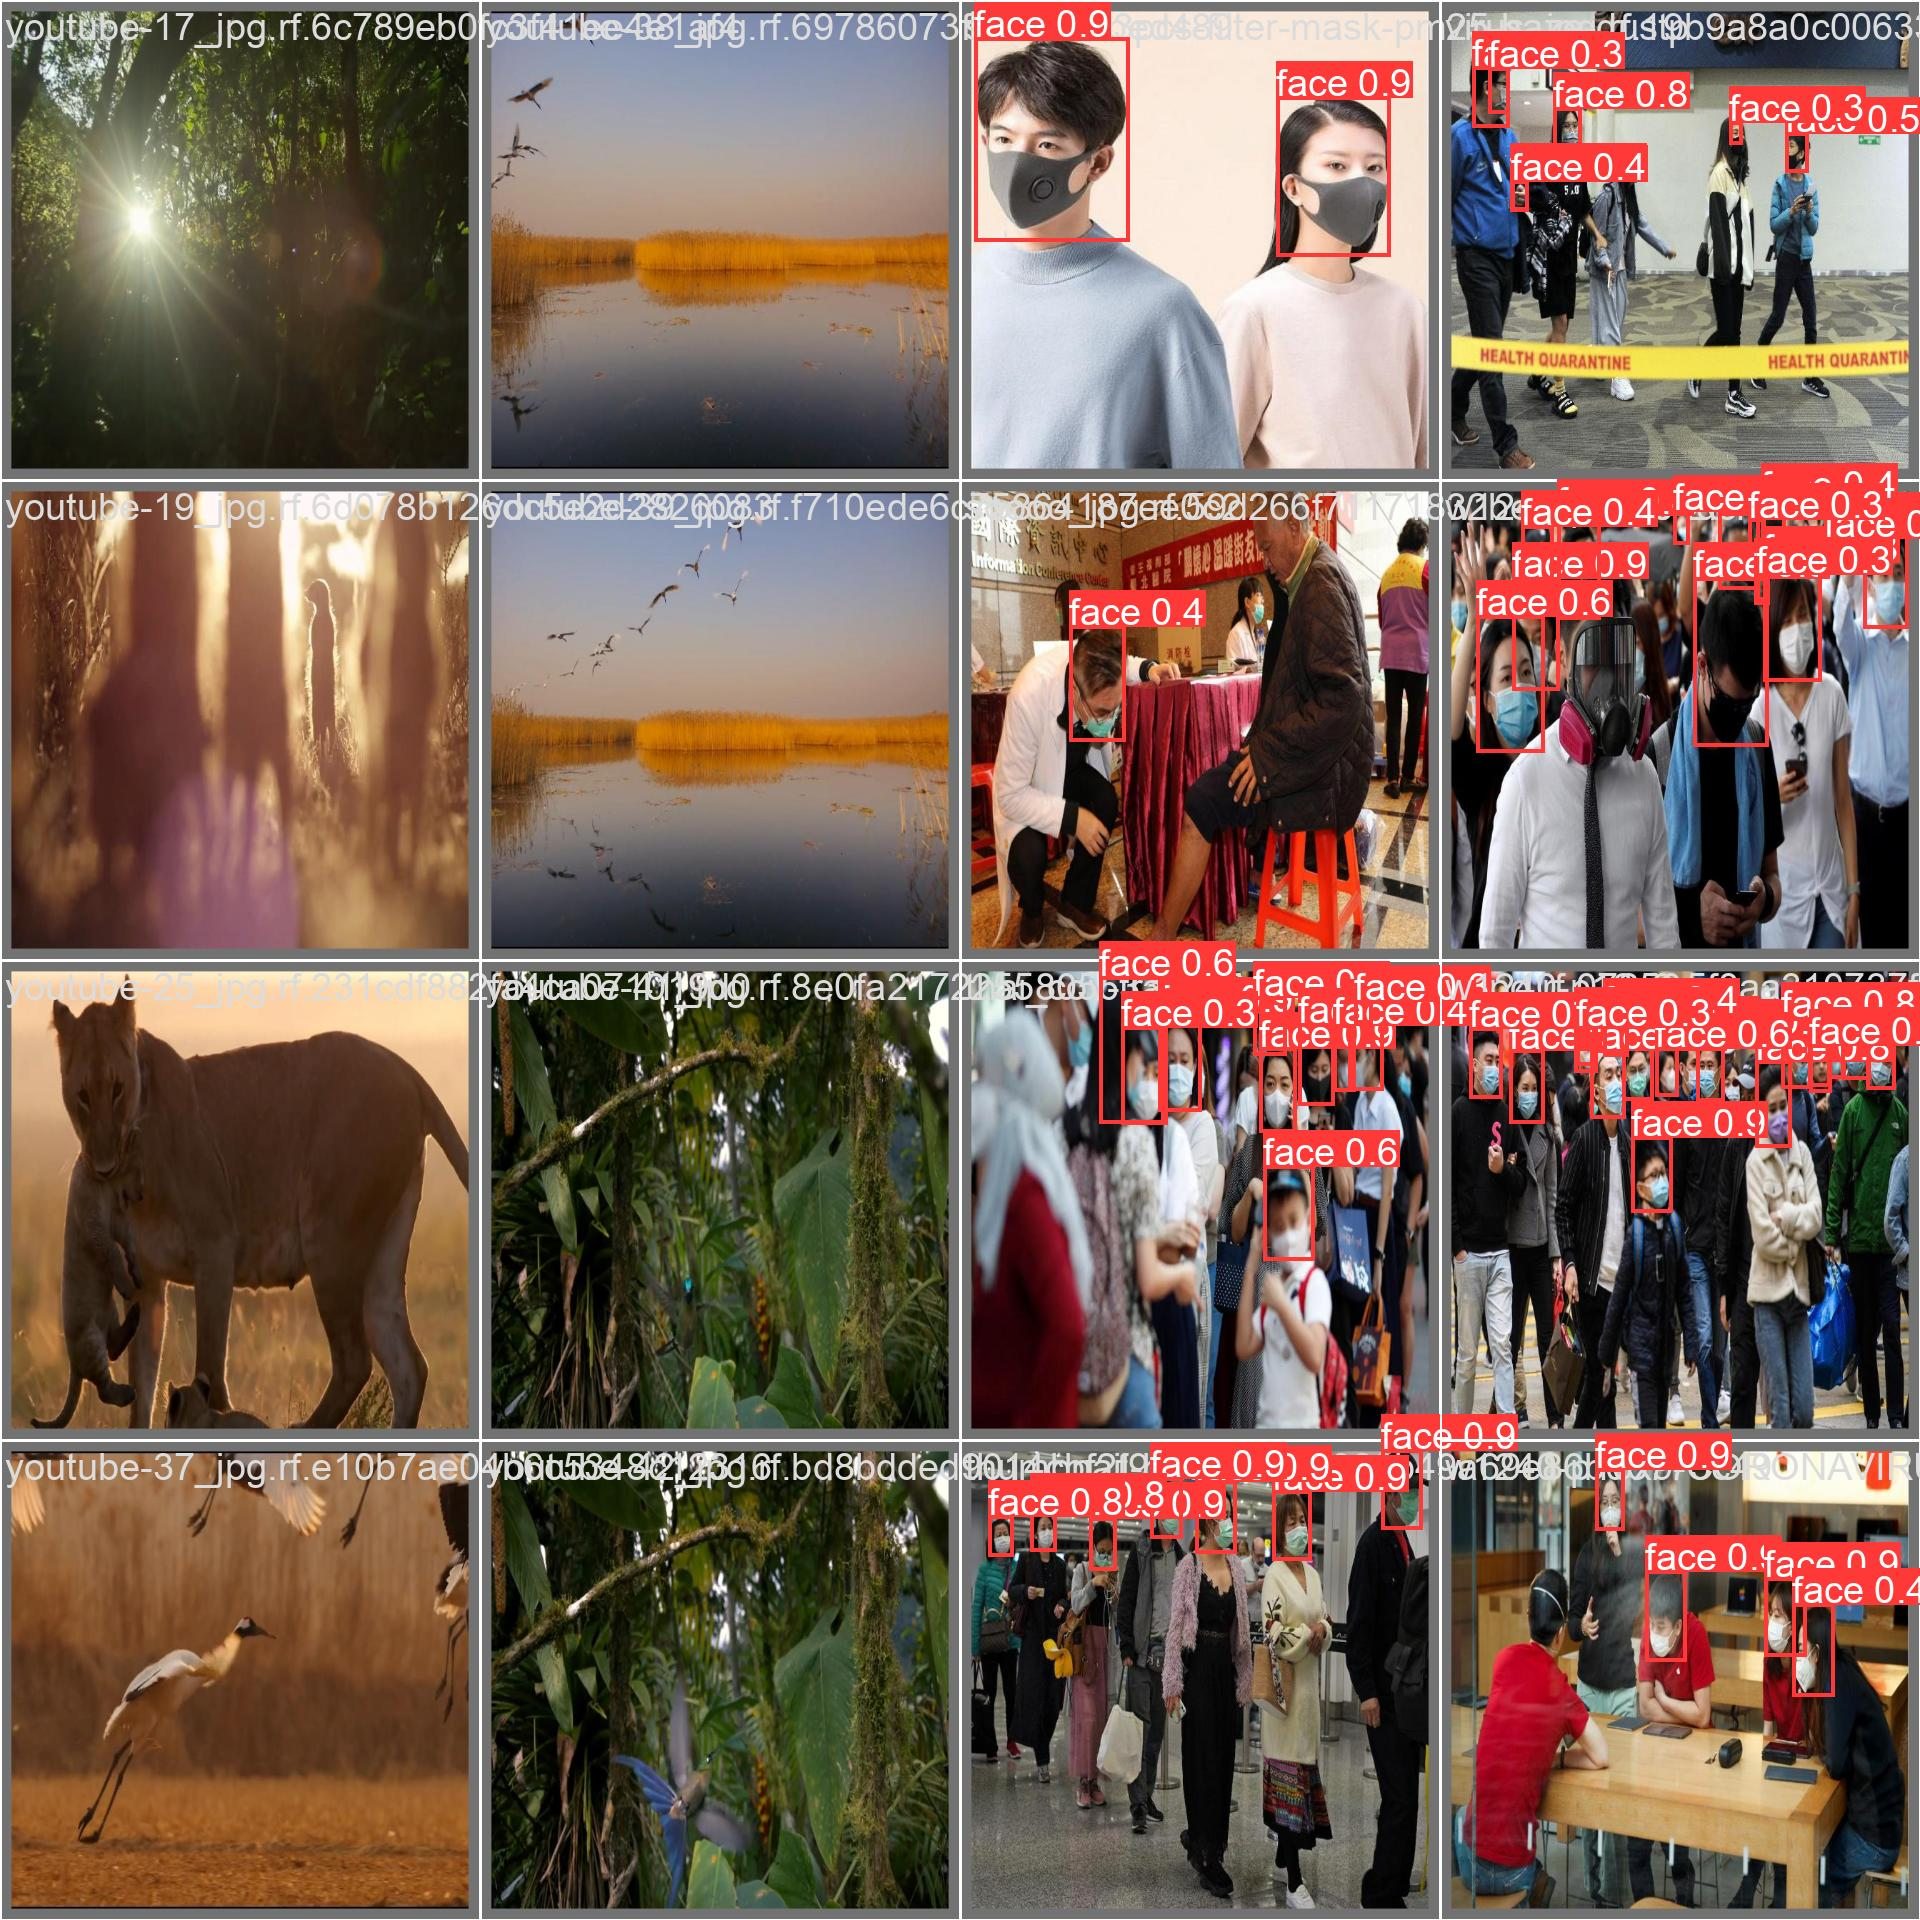

In [18]:
# kiểm thử ảnh đã train
Image(filename=f"/content/yolov10/runs/detect/train/val_batch0_pred.jpg", width=1000)

In [19]:
# đánh giá mô hình
model.val(data=f'{dataset.location}/data.yaml', batch=256)

Ultralytics YOLOv8.1.34 🚀 Python-3.10.12 torch-2.0.1+cu117 CUDA:0 (Tesla T4, 15102MiB)


val: Scanning /content/yolov10/Face-Detection-15/valid/labels.cache... 267 images, 50 backgrounds, 0 corrupt: 100%|██████████| 267/267 [00:00<?, ?it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 2/2 [00:10<00:00,  5.16s/it]


                   all        267        506     0.0543     0.0835     0.0294      0.012
                person        267        506     0.0543     0.0835     0.0294      0.012
Speed: 7.8ms preprocess, 6.2ms inference, 0.0ms loss, 0.0ms postprocess per image
Results saved to /content/yolov10/runs/detect/val2


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7fea84633be0>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 

In [20]:
#  test custom data với bộ weights tốt nhất
model = YOLOv10('/content/yolov10/runs/detect/train/weights/best.pt')

In [21]:
results = model.predict("/content/drive/MyDrive/workspace/face detection/crowd.jpg")



image 1/1 /content/drive/MyDrive/workspace/face detection/crowd.jpg: 448x640 3 faces, 18.0ms
Speed: 1.9ms preprocess, 18.0ms inference, 1.1ms postprocess per image at shape (1, 3, 448, 640)


In [22]:
# path to save the predictions
results_path =f"{HOME}/drive/MyDrive/workspace/face detection/yolov10/runs/detect/exp3/"
os.makedirs(results_path, exist_ok=True)
# Display the results
results[0].save(os.path.join(results_path, "detect.jpeg"))

'/content/yolov10/drive/MyDrive/workspace/face detection/yolov10/runs/detect/exp3/detect.jpeg'

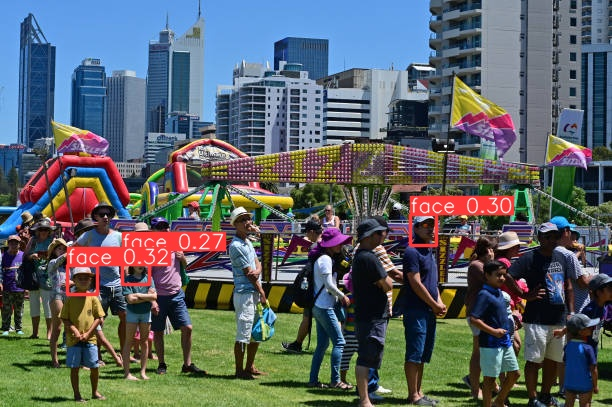

In [23]:
Image(filename=f"{HOME}/drive/MyDrive/workspace/face detection/yolov10/runs/detect/exp3/detect.jpeg", width=600)

In [25]:
# lưu thư mục yolov10
import locale
def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding
# đường dẫn đến thư mục cần chuyển
src_folder = '/content/yolov10'

# đường dẫn đến thư mục đích trên Google Drive
dst_folder = '/content/drive/MyDrive/workspace/save'

# sao chép thư mục vào Google Drive
!cp -r {src_folder} {dst_folder}

^C
